In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
from keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions
from keras.preprocessing import image
import numpy as np
from keras.layers import Dense, GlobalAveragePooling2D,Dropout,Input
# from keras.layers.advanced_activations import LeakyReLU, ELU
from keras.models import Sequential,Model
from keras import backend as K
from IPython.display import display

Using TensorFlow backend.


In [3]:
base_model  = InceptionV3(weights = 'imagenet', include_top=False)
print('loaded model')

#Définir le dictionnaire pour le générateur de données d'image
data_gen_args = dict(preprocessing_function=preprocess_input, 
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip = True)

train_datagen = image.ImageDataGenerator(**data_gen_args)
test_datagen = image.ImageDataGenerator(**data_gen_args)

W0618 15:22:16.551091 140716455188352 deprecation_wrapper.py:118] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0618 15:22:16.579280 140716455188352 deprecation_wrapper.py:118] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0618 15:22:16.584939 140716455188352 deprecation_wrapper.py:118] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0618 15:22:16.613020 140716455188352 deprecation_wrapper.py:118] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0618 15:22:16.615286 1407164551

loaded model


In [5]:
train_generator = train_datagen.flow_from_directory("gdrive/My Drive/DEEP/chest_xray/train",
                                                    target_size=(299,299),batch_size=32)

valid_generator = test_datagen.flow_from_directory("gdrive/My Drive/DEEP/chest_xray/test",
                                                     target_size=(299,299),batch_size=32)

Found 4169 images belonging to 2 classes.
Found 1687 images belonging to 2 classes.


In [0]:
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

In [8]:
model = Sequential()

# Premiere couche (couche d'entree)
model.add(Conv2D(filters=4, kernel_size=2, padding='same',
                 activation='relu', input_shape=(299, 299, 3)))
model.add(MaxPooling2D(pool_size=2))

# Deuxieme couche
model.add(Conv2D(filters=8, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))

# Troisieme couche
model.add(Conv2D(filters=12, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

# Quatrieme couche
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

# Cinquieme couche
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))

# Sixieme couche (couche de sortie/classification)
model.add(Dense(2, activation='softmax')) 


model.summary()

# Compilation du modele avant l'entrainement
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

W0618 15:23:48.587394 140716455188352 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0618 15:23:48.754793 140716455188352 deprecation_wrapper.py:118] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_95 (Conv2D)           (None, 299, 299, 4)       52        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 4)       0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 149, 149, 8)       136       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 8)         0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 74, 74, 12)        396       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 12)        0         
__________

In [0]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

# Sauvegarder le modèle avec les meilleurs poids
checkpointer = ModelCheckpoint('content/gdrive/My Drive/model/model.h5', verbose=1,save_best_only=True)
# Arrêtez la formation si le modèle ne montre aucune amélioration 
stopper = EarlyStopping(monitor='val_loss',min_delta=0.1,patience=0,verbose=1,mode='auto')

In [0]:
history_model = model.fit_generator(train_generator, steps_per_epoch = 348,
                                    validation_data=valid_generator,
                                    validation_steps=151, 
                                    epochs=30,verbose=1,
                                    callbacks=[checkpointer])

In [0]:
display(history_model.history)

{'acc': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [1.2382982238567671e-07,
  1.1949586564696801e-07,
  1.2365100150628467e-07,
  1.1982537251492607e-07,
  1.1920930376163597e-07,
  1.1920930376163597e-07,
  1.1920930376163597e-07,
  1.1920930376163597e-07,
  1.1920930376163597e-07,
  1.1920930376163597e-07,
  1.1920930376163597e-07,
  1.1920930376163597e-07,
  1.1949586564696801e-07,
  1.1920930376163597e-07,
  1.1920930376163597e-07,
  1.1920930376163597e-07,
  1.1920930376163597e-07,
  1.1920930376163597e-07,
  1.1949586564696801e-07,
  1.1920930376163597e-07,
  1.1920930376163597e-07,
  1.1920930376163597e-07,
  1.1920930376163597e-07,
  1.1920930376163597e-07,
  1.1920930376163597e-07,
  1.1920930376163597e-07,
  1.1920930376163597e-07,
  1.1920930376163597e-07,
  1.1920930376163597e-07,
  1.1920930376163597

In [0]:
def plot_training(history):
    acc = history_model.history['acc'] 
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs  = range(len(acc))
    
    plt.plot(epochs,acc,'b')
    plt.plot(epochs,val_acc,'r')
    plt.title("Précision de formation et de validation")
    
    plt.figure()
    plt.plot(epochs,loss,'b')
    plt.plot(epochs,val_loss,'r')
    plt.title("Perte de formation et de validation")
    
    plt.show()

In [0]:
import matplotlib.pyplot as plt

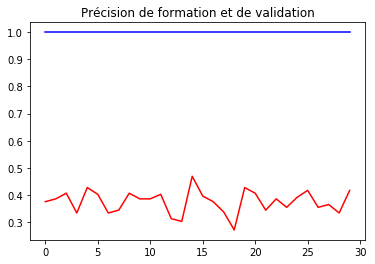

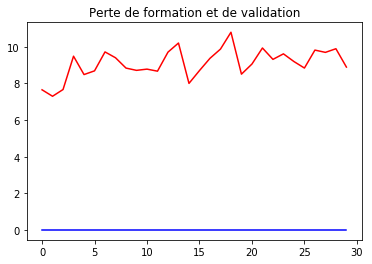

In [0]:
plot_training(history_model)

In [0]:

import h5py

In [0]:

# Chargez les poids à partir du modèle affiné
model.load_weights('content/gdrive/My Drive/Colab Notebooks/model_meilleurs_poids')

In [0]:
from keras.preprocessing.image import img_to_array,load_img
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
def pred(img_path):    
    img = load_img(img_path,target_size = (299,299)) #Chargez l'image et réglez la taille cible sur la taille d'entrée de notre modèle
    x = img_to_array(img) # Convertir l'image en tableau
    x = np.expand_dims(x,axis=0) # Convertir le tableau à la forme (1, x, y, z)
    x = preprocess_input(x) # Utiliser la fonction d’entrée de prétraitement o soustraire la moyenne de toutes les images
    p = np.argmax(model.predict(x)) # Stocke l'argmax des prédictions
    if p==0:     # Si P=0 (Stop) , P=1 (Tourner a gauche) , P=2 (Tourner a droite) , P=3 (Quarante Km/h) , P=4 (Arrêt)
        print("NORMAL")
    elif p==1:
        print("PNEUMONIA")
    

In [0]:
pred("content/VIRUS-9963654-0001.jpeg")
z = plt.imread('content/VIRUS-9963654-0001.jpeg') 
plt.imshow(z);  
content/VIRUS-9963654-0001.jpeg

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

In [0]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

In [0]:
!cat /proc/meminfo

In [0]:
#read data
import pandas as pd
import numpy as np
from google.colab import files
file = files.upload()
d = pd.read_csv('chest_xray.csv')

In [0]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

# plot the dataset, referencing dataframe column names
import altair as alt
alt.Chart(cars).mark_bar().encode(
  x=alt.X('Miles_per_Gallon', bin=True),
  y='count()',
)

In [0]:
!pip install -q matplotlib-venn

In [0]:
!apt-get -qq install -y libfluidsynth1

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 130812 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...


In [0]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -q -U libarchive
import libarchive

In [0]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

In [0]:
!apt-get -qq install python-cartopy python3-cartopy
import cartopy

In [0]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

# plot the dataset, referencing dataframe column names
import altair as alt
alt.Chart(cars).mark_bar().encode(
  x=alt.X('Miles_per_Gallon', bin=True),
  y='count()',
)

In [0]:
!pip install -q matplotlib-venn

In [0]:
!apt-get -qq install -y libfluidsynth1

In [0]:
# To determine which version you're using:
!pip show tensorflow

# For the current version: 
!pip install --upgrade tensorflow

# For a specific version:
!pip install tensorflow==1.2

# For the latest nightly build:
!pip install tf-nightly

In [0]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -q -U libarchive
import libarchive

In [0]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

In [0]:
!apt-get -qq install python-cartopy python3-cartopy
import cartopy

In [0]:
!pip install  numpy

In [0]:
import matplotlib.pyplot as plt

In [0]:
import numpy as np

In [0]:
!pip install  imageio

In [0]:
import argparse

In [0]:
!pip install  argparse

In [0]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

In [19]:
!apt-get -qq install python-cartopy python3-cartopy
import cartopy

Selecting previously unselected package python-pkg-resources.
(Reading database ... 130912 files and directories currently installed.)
Preparing to unpack .../0-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-pyshp.
Preparing to unpack .../1-python-pyshp_1.2.12+ds-1_all.deb ...
Unpacking python-pyshp (1.2.12+ds-1) ...
Selecting previously unselected package python-shapely.
Preparing to unpack .../2-python-shapely_1.6.4-1_amd64.deb ...
Unpacking python-shapely (1.6.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-cartopy:amd64.
Preparing to unpack .../4-python-cartopy_0.14.2+dfsg1-2build3_amd64.deb ...
Unpacking python-cartopy:amd64 (0.14.2+dfsg1-2build3) ...
Selecting previously unselected package python3-pkg-resources.
Preparing to unpack .../5-pyth

In [0]:
import numpy as np # Линейная алгебра
import pandas as pd # Обработка и анализ данных
from wordcloud import WordCloud # Облако тегов
from wordcloud import STOPWORDS # Останавливает слова
import nltk # Символьная и статистическая обработка естественного языка
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt 
import seaborn as sns # Статистическая визуализация данных
import scikitplot as skplt #
from sklearn.model_selection import train_test_split # Разделяет массивы и матрицы в рандомные train and test subsets 

In [0]:
df_labels = df['Label']

In [0]:
count_Class = pd.value_counts(df.Label, sort = True)
# Data to Plot
labels = 'train', 'test'
sizes = [count_Class[0], count_Class[1]]
colors = ['lightskyblue', 'aqua']
explode = (0.1, 0.1)

# Plot
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()
